# Pratical Week 2 

## Part I: Data Loading and Pre-processing:

### Q1: data loading

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/meviusz/UQ/sem2-23/DATA7703/prac2/pokemonsrt.csv")
print(f"{df.head()}\n")
print(f"{df.info()}\n")
print(f"{df.isnull().sum()}\n")
for column in df:
    print(f"{df[column].describe()}\n")

                         abilities  against_bug  against_dark  against_dragon   
0      ['Shield Dust', 'Run Away']          1.0           1.0             1.0  \
1                    ['Shed Skin']          1.0           1.0             1.0   
2  ['Compoundeyes', 'Tinted Lens']          0.5           1.0             1.0   
3      ['Shield Dust', 'Run Away']          0.5           1.0             1.0   
4                    ['Shed Skin']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire   
0               1.0            1.0           0.50           2.0  \
1               1.0            1.0           0.50           2.0   
2               2.0            1.0           0.25           2.0   
3               1.0            0.5           0.25           2.0   
4               1.0            0.5           0.25           2.0   

   against_flying  against_ghost  ...  percentage_male  pokedex_number   
0             2.0            1.0  ..

### Q2: eliminate the missing values

(a) remove the rows or columns that contain missing values.

In [3]:
q2data = df.dropna() #从 DataFrame 中删除包含缺失值（NaN）的行或列
print(f"{q2data.isnull().sum()}\n")

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64



 (b) imputing the data (replacing missing values)

In [4]:
# Create a copy of the data for later use
df_q2b = df.copy()

# Find the columns index with different type 
num_columns = df.select_dtypes(include=["int","float"]).columns
cate_columns = df.select_dtypes(include=["object"]).columns

#  Replace missing values with the mean of the feature if the feature is numerical
mean_imputer = SimpleImputer(strategy='mean')
df_q2b[num_columns] = mean_imputer.fit_transform(df_q2b[num_columns])

#  Replace missing values with the most frequent value if the feature is categorical
cate_imputer = SimpleImputer(strategy='most_frequent')
df_q2b[cate_columns] = cate_imputer.fit_transform(df_q2b[cate_columns])

In [5]:
df_q2b[cate_columns] 

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
0,"['Shield Dust', 'Run Away']",255,Worm Pokémon,Caterpieキャタピー,Caterpie,bug,flying
1,['Shed Skin'],120,Cocoon Pokémon,Transelトランセル,Metapod,bug,flying
2,"['Compoundeyes', 'Tinted Lens']",45,Butterfly Pokémon,Butterfreeバタフリー,Butterfree,bug,flying
3,"['Shield Dust', 'Run Away']",255,Hairy Pokémon,Beedleビードル,Weedle,bug,poison
4,['Shed Skin'],120,Cocoon Pokémon,Cocoonコクーン,Kakuna,bug,poison
...,...,...,...,...,...,...,...
796,"['Water Bubble', 'Water Absorb']",200,Water Bubble Pokémon,Shizukumoシズクモ,Dewpider,water,bug
797,"['Water Bubble', 'Water Absorb']",100,Water Bubble Pokémon,Onishizukumoオニシズクモ,Araquanid,water,bug
798,"['Innards Out', 'Unaware']",60,Sea Cucumber Pokémon,Namakobushiナマコブシ,Pyukumuku,water,flying
799,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",80,Gnash Teeth Pokémon,Hagigishiriハギギシリ,Bruxish,water,psychic


(c) encoding non-numercial feature as an integer value

In [49]:
# 创建 LabelEncoder 实例
encoder = LabelEncoder()

for column in cate_columns:
    df_q2b[column] = encoder.fit_transform(df_q2b[column])

df_q2b[cate_columns] 

,abilities,capture_rate,classfication,japanese_name,name,type1,type2
0,347,20,584,79,87,0,7
1,340,1,103,715,431,0,7
2,50,25,75,75,76,0,7
3,347,20,224,50,766,0,13
4,340,1,103,98,332,0,13
...,...,...,...,...,...,...,...
796,475,14,559,663,155,17,0
797,475,0,559,563,16,17,0
798,144,28,438,509,539,17,7
799,67,32,214,258,69,17,14


In [48]:
# 使用 inverse_transform 查看整数值 7 对应的原始字符串值
original_value = encoder.inverse_transform([7])
print(original_value)


['flying']


## Part II: Data Visualisation and Exploratory Data Analysis (EDA):

### Q3: Visualise the data

Text(0.5, 1.0, 'before')

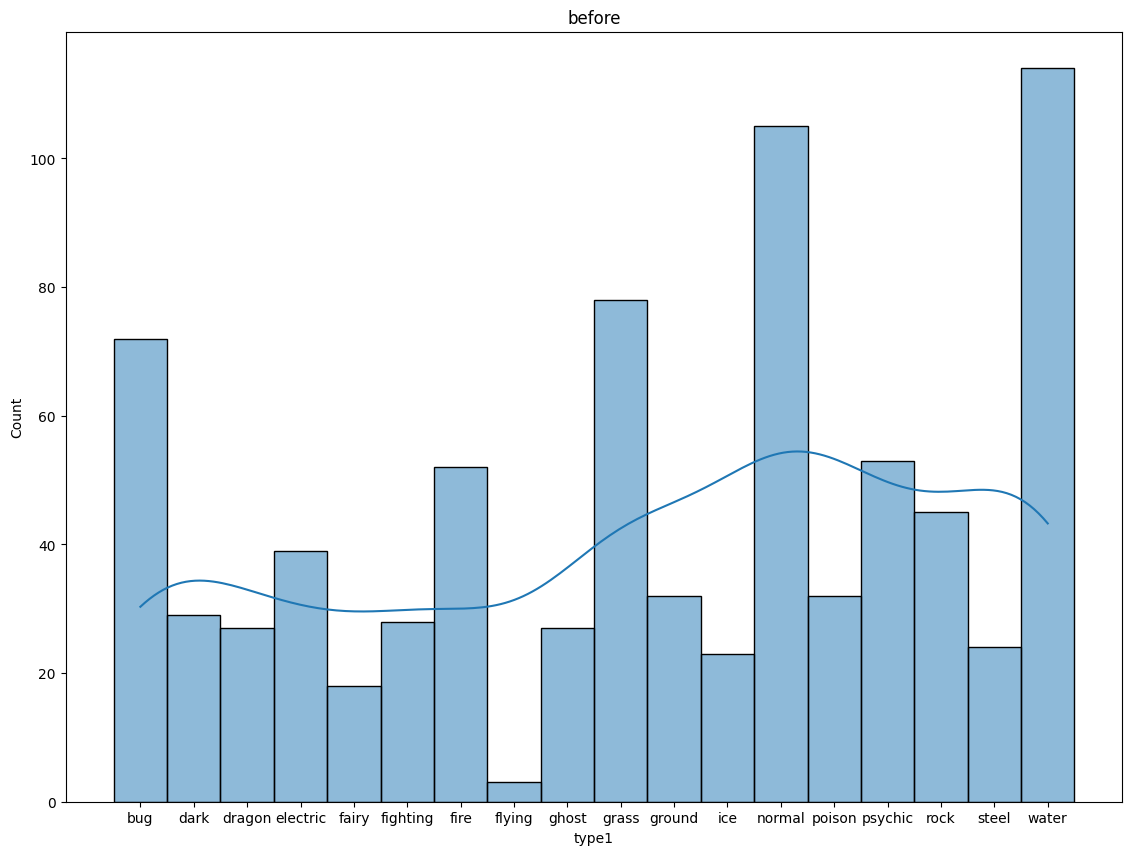

In [72]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.histplot(df['type1'], kde=True)  # 'numerical_column'替换为你的数值特征列名
plt.title("before")

Text(0.5, 1.0, 'after')

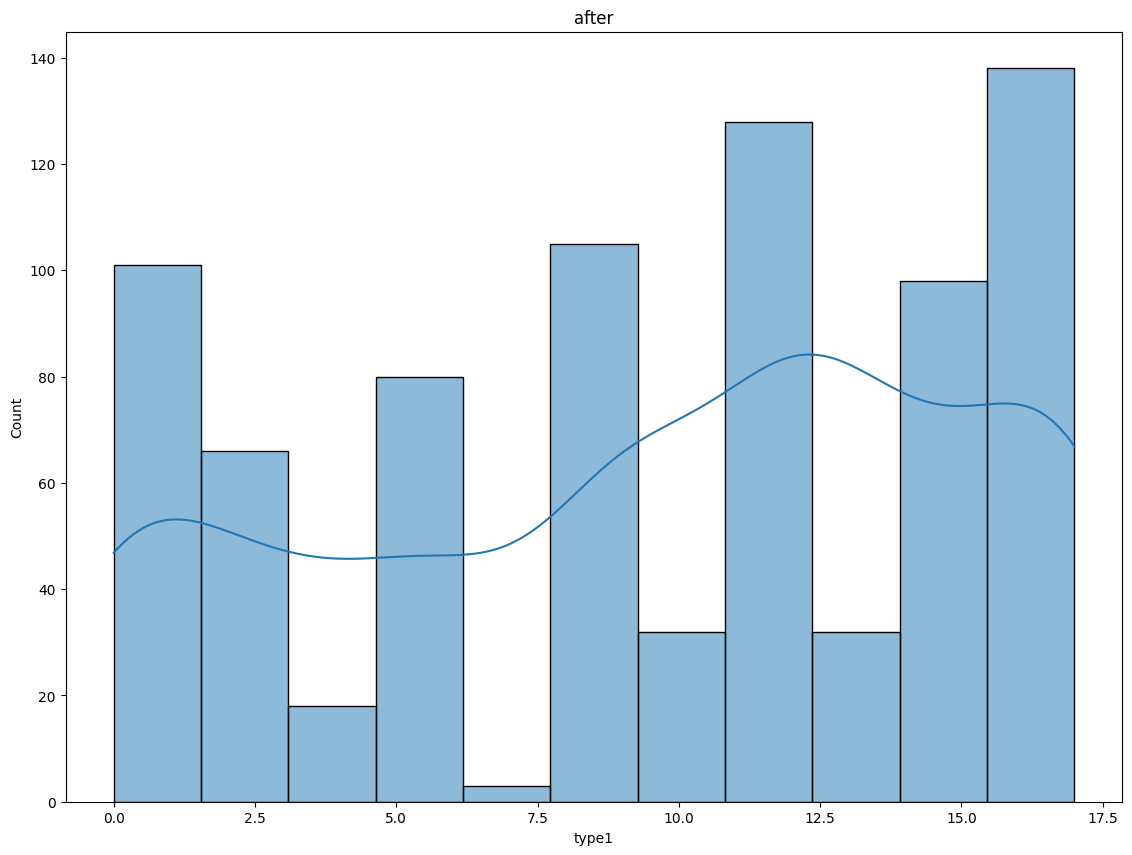

In [73]:
# 绘制填充后的数据
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 2)
sns.histplot(df_q2b['type1'], kde=True)  # 'numerical_column'替换为你的数值特征列名
plt.title("after")

In [68]:
plt.show()